# 1. Fase 1

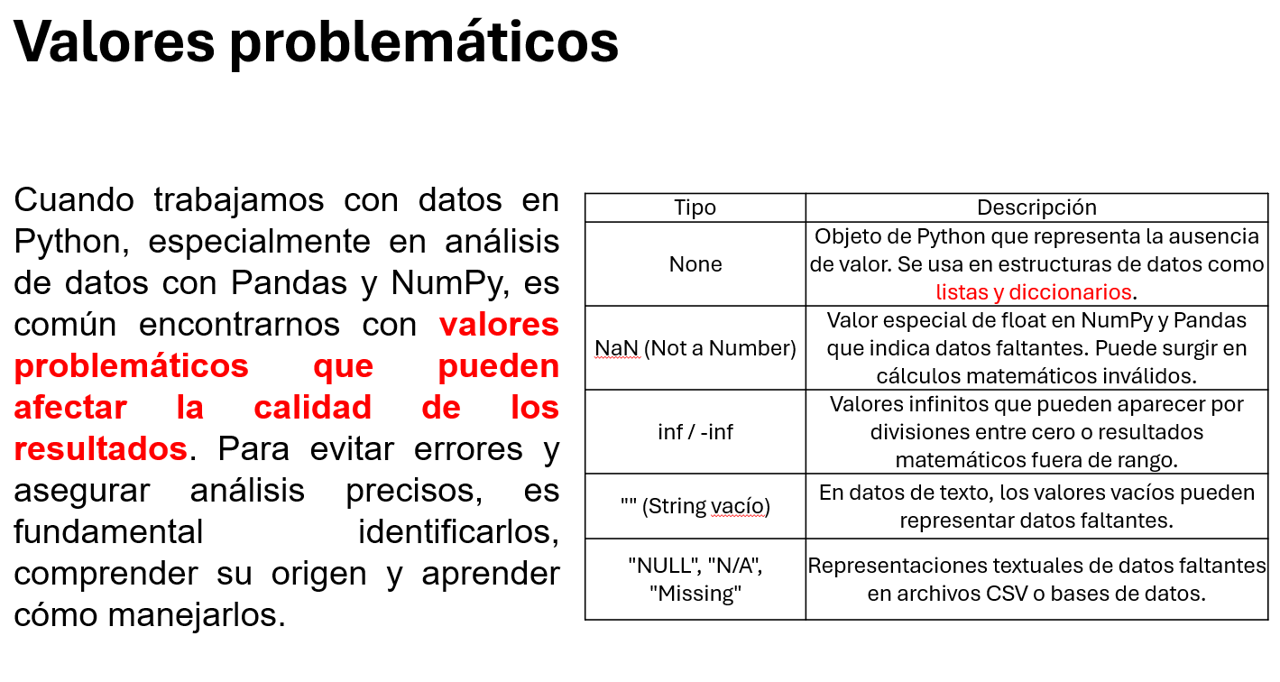

# crear registros problematicos

In [54]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores numéricos y valores problemáticos
data = {
    "Nombre": ["Juan", "María", "Carlos", "Ana", "Luis", "Sofía", "Pedro", "Lucía", "Diego", "Elena"],
    "Edad": [25, 30, 35, np.nan, 40, "NaN", 50, None, 60, "N/A"],
    "Pasos al día": [10000, 8000, "nAn", 9000, np.inf, 6000, -np.inf, 7000, 5000, 9500],
    "Peso (kg)": [70, 65, 80, 75, 90, "NULL", 85, "sin registro", 95, "NaN"],
    "Altura (m)": [1.75, 1.80, 1.65, 1.70, 1.85, 1.78, 1.76, None, "", 1.82]
}

# Guardar como archivo Excel
file_path = "datos_prueba.xlsx"
df = pd.DataFrame(data)
df.to_excel(file_path, index=False)



In [55]:
df

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25,10000,70,1.75
1,María,30,8000,65,1.8
2,Carlos,35,nAn,80,1.65
3,Ana,NaN,9000,75,1.7
4,Luis,40,inf,90,1.85
5,Sofía,NaN,6000,NULL,1.78
6,Pedro,50,-inf,85,1.76
7,Lucía,None,7000,sin registro,None
8,Diego,60,5000,95,
9,Elena,N/A,9500,NaN,1.82


## cargar un archivo

In [56]:
# Cargar el archivo para mostrar cómo lo interpreta Pandas por defecto
df_cargado = pd.read_excel(file_path)
df_cargado

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000,70,1.75
1,María,30.0,8000,65,1.80
2,Carlos,35.0,nAn,80,1.65
3,Ana,NaN,9000,75,1.70
4,Luis,40.0,inf,90,1.85
5,Sofía,NaN,6000,NaN,1.78
6,Pedro,50.0,-inf,85,1.76
7,Lucía,NaN,7000,sin registro,NaN
8,Diego,60.0,5000,95,NaN
9,Elena,NaN,9500,NaN,1.82


## convertir a NaN

In [57]:
# Recargar el archivo con especificaciones para manejar valores problemáticos
df_cargado2 = pd.read_excel(file_path, na_values=["nAn", "sin registro"])


df_cargado2

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80
2,Carlos,35.0,NaN,80.0,1.65
3,Ana,NaN,9000.0,75.0,1.70
4,Luis,40.0,inf,90.0,1.85
5,Sofía,NaN,6000.0,NaN,1.78
6,Pedro,50.0,-inf,85.0,1.76
7,Lucía,NaN,7000.0,NaN,NaN
8,Diego,60.0,5000.0,95.0,NaN
9,Elena,NaN,9500.0,NaN,1.82


## Convertir inf a NaN

In [58]:
# Reemplazar inf y -inf por NaN manualmente
df_cargado2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cargado2

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80
2,Carlos,35.0,NaN,80.0,1.65
3,Ana,NaN,9000.0,75.0,1.70
4,Luis,40.0,NaN,90.0,1.85
5,Sofía,NaN,6000.0,NaN,1.78
6,Pedro,50.0,NaN,85.0,1.76
7,Lucía,NaN,7000.0,NaN,NaN
8,Diego,60.0,5000.0,95.0,NaN
9,Elena,NaN,9500.0,NaN,1.82


### Calcular la media sin NaN

In [5]:
# Calcular la media de la columna "Edad" ignorando los valores NaN
media_edad = df_cargado2["Edad"].mean()
# Mostrar el resultado
media_edad


np.float64(40.0)

### Calcular la media con NaN

In [6]:
# Aquí el NaN se convierte en 0 antes de calcular la media
EdadconNan=df_cargado2["Edad"].fillna(0).mean()
EdadconNan

np.float64(24.0)

In [7]:
EdadconNan
### los nan pueden subestimar el resultado de un dato

np.float64(24.0)

In [8]:
##cantidad de nan por variable
df_cargado2.isna().sum()

Nombre          0
Edad            4
Pasos al día    3
Peso (kg)       3
Altura (m)      2
dtype: int64

## Posible solución: imputar nan sobre el promedio

In [9]:
df_cargado2['Edad'] = df_cargado2['Edad'].fillna(40)

In [10]:
df_cargado2

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80
2,Carlos,35.0,NaN,80.0,1.65
3,Ana,40.0,9000.0,75.0,1.70
4,Luis,40.0,NaN,90.0,1.85
5,Sofía,40.0,6000.0,NaN,1.78
6,Pedro,50.0,NaN,85.0,1.76
7,Lucía,40.0,7000.0,NaN,NaN
8,Diego,60.0,5000.0,95.0,NaN
9,Elena,40.0,9500.0,NaN,1.82


In [59]:
### Como no trabajar con los demas NaN?
df_sin_null = df_cargado2.dropna()
df_sin_null

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80


In [60]:
#eliminacion de null por filas
df_sin_null_filas = df_cargado2.dropna(axis=0)
df_sin_null_filas

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80


In [61]:
#eliminacion de null por columnas
df_sin_null_columnas = df_cargado2.dropna(axis=1)
df_sin_null_columnas

,Nombre
0,Juan
1,María
2,Carlos
3,Ana
4,Luis
5,Sofía
6,Pedro
7,Lucía
8,Diego
9,Elena


In [62]:
df_cargado2

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80
2,Carlos,35.0,NaN,80.0,1.65
3,Ana,NaN,9000.0,75.0,1.70
4,Luis,40.0,NaN,90.0,1.85
5,Sofía,NaN,6000.0,NaN,1.78
6,Pedro,50.0,NaN,85.0,1.76
7,Lucía,NaN,7000.0,NaN,NaN
8,Diego,60.0,5000.0,95.0,NaN
9,Elena,NaN,9500.0,NaN,1.82


# Fase 2

## Crear dataframe de prueba

In [63]:
import pandas as pd

df_extra = pd.DataFrame({
    "Nombre": ["Juan", "María", "Carlos", "Ana", "Luis", "Sofía", "Pedro", "Lucía", "Daniel", "Elena"],
    "Ciudad": ["Bogotá", "Medellín", "Lima", "Santiago", "Quito", "Buenos Aires", "Caracas", "Montevideo", "CDMX", "Madrid"],
    "Ocupación": ["Ingeniero", "Médico", "Profesor", "Estudiante", "Arquitecto", "Diseñadora", "Empresario", "Científica", "Chef", "Escritora"]
})
df_extra

,Nombre,Ciudad,Ocupación
0,Juan,Bogotá,Ingeniero
1,María,Medellín,Médico
2,Carlos,Lima,Profesor
3,Ana,Santiago,Estudiante
4,Luis,Quito,Arquitecto
5,Sofía,Buenos Aires,Diseñadora
6,Pedro,Caracas,Empresario
7,Lucía,Montevideo,Científica
8,Daniel,CDMX,Chef
9,Elena,Madrid,Escritora


## Merge

 # <font color='green'>Manipulación de DataFrames</font>


 ## <font color='green'>Combinar y unir datos</font>


- En **SQL**, conocemos las maneras de unir tablas mediante el cruce de una o más columnas usando JOINS.Los tipos más utilizados son los siguientes:


- **INNER JOIN:** Este comando devuelve solo los registros que tienen coincidencias en ambas tablas.
- **LEFT JOIN:** Este comando devuelve todos los registros de la tabla de la izquierda y los registros coincidentes de la tabla de la derecha. **Si no hay coincidencias en la tabla de la derecha, los campos aparecerán como nulos.**
- **RIGHT JOIN:** Este comando devuelve todos los registros de la tabla de la derecha y los registros coincidentes de la tabla de la izquierda. **Si no hay coincidencias en la tabla de la izquierda, los campos aparecerán como nulos.**
- **FULL OUTER JOIN:** Este comando devuelve todos los registros de ambas tablas. Si hay coincidencias, se incluyen en el resultado. **Si no hay coincidencias, los campos aparecerán como nulos.**

<center>

<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" width="500">

Fuente: https://estradawebgroup.com/ImagesUpload/sql-joins.jpg

</center>

In [66]:
df_cargado2

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25.0,10000.0,70.0,1.75
1,María,30.0,8000.0,65.0,1.80
2,Carlos,35.0,NaN,80.0,1.65
3,Ana,NaN,9000.0,75.0,1.70
4,Luis,40.0,NaN,90.0,1.85
5,Sofía,NaN,6000.0,NaN,1.78
6,Pedro,50.0,NaN,85.0,1.76
7,Lucía,NaN,7000.0,NaN,NaN
8,Diego,60.0,5000.0,95.0,NaN
9,Elena,NaN,9500.0,NaN,1.82


In [13]:
df_extra

,Nombre,Ciudad,Ocupación
0,Juan,Bogotá,Ingeniero
1,María,Medellín,Médico
2,Carlos,Lima,Profesor
3,Ana,Santiago,Estudiante
4,Luis,Quito,Arquitecto
5,Sofía,Buenos Aires,Diseñadora
6,Pedro,Caracas,Empresario
7,Lucía,Montevideo,Científica
8,Daniel,CDMX,Chef
9,Elena,Madrid,Escritora


In [68]:
df_cargado2.columns

Index(['Nombre', 'Edad', 'Pasos al día', 'Peso (kg)', 'Altura (m)'], dtype='object')

In [69]:
df_extra.columns

Index(['Nombre', 'Ciudad', 'Ocupación'], dtype='object')

In [76]:
union = pd.merge(df_cargado2, df_extra, how='outer', left_on='Nombre', right_on='Nombre')
union

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m),Ciudad,Ocupación
0,Ana,NaN,9000.0,75.0,1.70,Santiago,Estudiante
1,Carlos,35.0,NaN,80.0,1.65,Lima,Profesor
2,Daniel,NaN,NaN,NaN,NaN,CDMX,Chef
3,Diego,60.0,5000.0,95.0,NaN,NaN,NaN
4,Elena,NaN,9500.0,NaN,1.82,Madrid,Escritora
5,Juan,25.0,10000.0,70.0,1.75,Bogotá,Ingeniero
6,Lucía,NaN,7000.0,NaN,NaN,Montevideo,Científica
7,Luis,40.0,NaN,90.0,1.85,Quito,Arquitecto
8,María,30.0,8000.0,65.0,1.80,Medellín,Médico
9,Pedro,50.0,NaN,85.0,1.76,Caracas,Empresario


In [67]:
# Fusionar los DataFrames usando "Nombre" como clave de combinación (left join)
df_fusionado = pd.merge(df_cargado2, df_extra, on="Nombre", how="left")
df_fusionado

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m),Ciudad,Ocupación
0,Juan,25.0,10000.0,70.0,1.75,Bogotá,Ingeniero
1,María,30.0,8000.0,65.0,1.80,Medellín,Médico
2,Carlos,35.0,NaN,80.0,1.65,Lima,Profesor
3,Ana,NaN,9000.0,75.0,1.70,Santiago,Estudiante
4,Luis,40.0,NaN,90.0,1.85,Quito,Arquitecto
5,Sofía,NaN,6000.0,NaN,1.78,Buenos Aires,Diseñadora
6,Pedro,50.0,NaN,85.0,1.76,Caracas,Empresario
7,Lucía,NaN,7000.0,NaN,NaN,Montevideo,Científica
8,Diego,60.0,5000.0,95.0,NaN,NaN,NaN
9,Elena,NaN,9500.0,NaN,1.82,Madrid,Escritora


### suffixes

In [77]:
import pandas as pd

# DataFrame 1
df1 = pd.DataFrame({
    "ID": [1, 2, 3],
    "Nombre": ["Juan", "María", "Carlos"],
    "Edad": [25, 30, 35],
    "Salario": [1000, 2000, 3000]
})

# DataFrame 2
df2 = pd.DataFrame({
    "ID": [2, 3, 4],
    "Nombre": ["María", "Carlos", "Ana"],
    "Edad": [28, 33, 40],
    "Salario": [2200, 3300, 4400]
})


In [78]:
df1

,ID,Nombre,Edad,Salario
0,1,Juan,25,1000
1,2,María,30,2000
2,3,Carlos,35,3000


In [79]:
df2

,ID,Nombre,Edad,Salario
0,2,María,28,2200
1,3,Carlos,33,3300
2,4,Ana,40,4400


In [80]:
# Combinar DataFrames
resultado = pd.merge(df1, df2, on="ID", how="inner")
resultado


,ID,Nombre_x,Edad_x,Salario_x,Nombre_y,Edad_y,Salario_y
0,2,María,30,2000,María,28,2200
1,3,Carlos,35,3000,Carlos,33,3300


In [81]:
resultado = pd.merge(df1, df2, on="ID", how="inner", suffixes=("_original", "_nuevo"))
resultado

,ID,Nombre_original,Edad_original,Salario_original,Nombre_nuevo,Edad_nuevo,Salario_nuevo
0,2,María,30,2000,María,28,2200
1,3,Carlos,35,3000,Carlos,33,3300


## Pivote

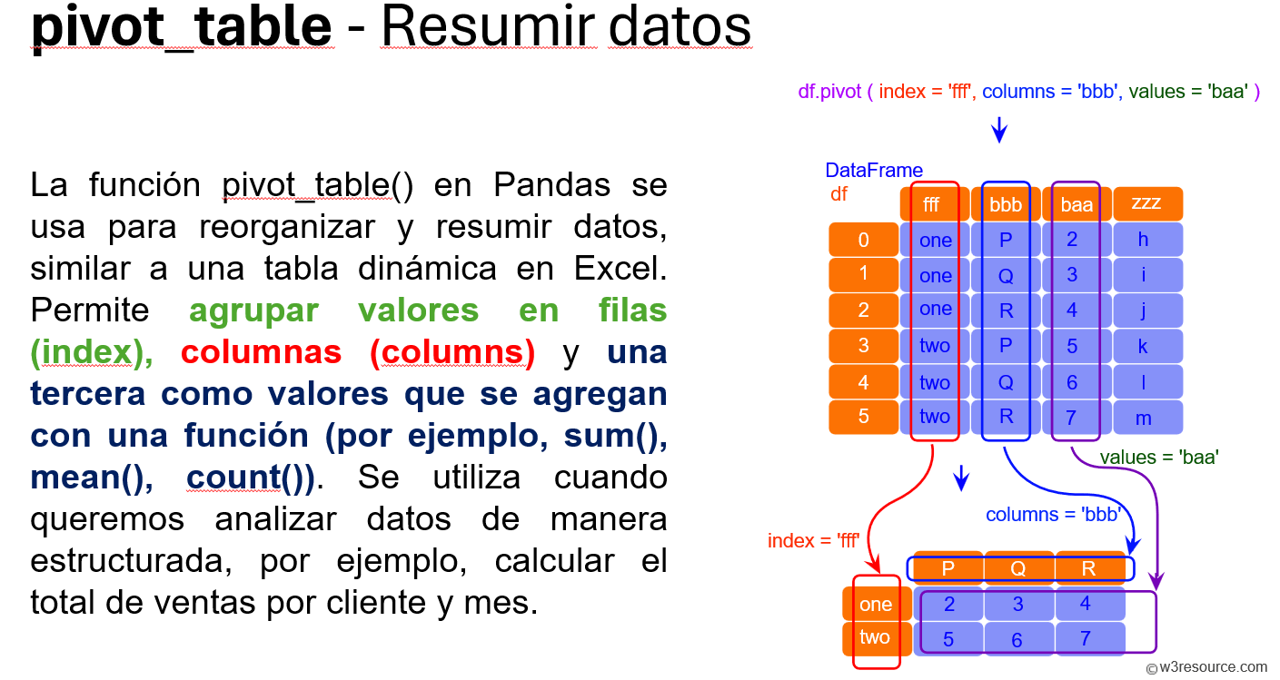

In [82]:
df = pd.DataFrame({
    "Nombre": ["Juan", "María", "Juan", "María","Daniela","Daniela","Juan", "María", "Juan"],
    "Mes": ["Enero", "Enero", "Febrero", "Febrero", "Enero", "Febrero","Enero","Enero","Enero"],
    "Ventas": [200, 150, 300, 250, 340, 123, 150, 300, 250]
})

df

,Nombre,Mes,Ventas
0,Juan,Enero,200
1,María,Enero,150
2,Juan,Febrero,300
3,María,Febrero,250
4,Daniela,Enero,340
5,Daniela,Febrero,123
6,Juan,Enero,150
7,María,Enero,300
8,Juan,Enero,250


In [87]:
tabla_mean = df.pivot_table(index="Nombre", columns="Mes", values="Ventas", aggfunc="count")
tabla_mean = tabla_mean.round(0).astype(int)  # Redondear y pasar a int
print("Pivot con mean:")
print(tabla_mean)

Pivot con mean:
Mes      Enero  Febrero
Nombre                 
Daniela      1        1
Juan         3        1
María        2        1


*   aggfunc="sum"      # Suma los valores
*   aggfunc="mean"     # Promedio
*   aggfunc="median"   # Mediana
*   aggfunc="min"      # Valor mínimo
*   aggfunc="max"      # Valor máximo
*   aggfunc="count"    # Cuenta el número de valores
*   aggfunc="std"      # Desviación estándar
*   aggfunc="var"      # Varianza
*   aggfunc="first"    # Primer valor encontrado
*   aggfunc="last"     # Último valor encontrado


In [83]:
tabla_mean = df.pivot_table(index="Nombre", columns="Mes", values="Ventas", aggfunc="mean")
tabla_mean = tabla_mean.round(0).astype(int)  # Redondear y pasar a int
print("Pivot con mean:")
print(tabla_mean)

tabla_sum = df.pivot_table(index="Nombre", columns="Mes", values="Ventas", aggfunc="sum")
print("\nPivot con sum:")
print(tabla_sum)

Pivot con mean:
Mes      Enero  Febrero
Nombre                 
Daniela    340      123
Juan       200      300
María      225      250

Pivot con sum:
Mes      Enero  Febrero
Nombre                 
Daniela    340      123
Juan       600      300
María      450      250


## Concat

Cuando queremos unir dos DataFrames uno debajo del otro.

In [88]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})



In [89]:
df1

,A,B
0,1,3
1,2,4


In [90]:
df2

,A,B
0,5,7
1,6,8


In [91]:
resultado = pd.concat([df1, df2])
resultado


,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [26]:
resultado = pd.concat([df1, df2], ignore_index=True)
resultado

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


Concatenar DataFrames por Columnas (axis=1)

In [27]:
df3 = pd.DataFrame({'C': ['X', 'Y'], 'D': ['Z', 'W']})
df3


,C,D
0,X,Z
1,Y,W


In [28]:
resultado = pd.concat([df1, df3], axis=1)
print(resultado)

   A  B  C  D
0  1  3  X  Z
1  2  4  Y  W


In [29]:
print(resultado)

   A  B  C  D
0  1  3  X  Z
1  2  4  Y  W


In [30]:
resultado

,A,B,C,D
0,1,3,X,Z
1,2,4,Y,W


# Borrar nan

In [31]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores faltantes
df = pd.DataFrame({
    "Nombre": ["Juan", "María", "Carlos", "Ana"],
    "Edad": [25, np.nan, 35, 30],
    "Ciudad": ["Lima", "Quito", None, "Bogotá"]
})

df

,Nombre,Edad,Ciudad
0,Juan,25.0,Lima
1,María,NaN,Quito
2,Carlos,35.0,None
3,Ana,30.0,Bogotá


In [32]:
# Usar dropna para eliminar filas con cualquier valor faltante
df_limpio1 = df.dropna()
df_limpio1


,Nombre,Edad,Ciudad
0,Juan,25.0,Lima
3,Ana,30.0,Bogotá


In [33]:
# Eliminar columnas con valores faltantes
df_limpio2 = df.dropna(axis=1)
df_limpio2

,Nombre
0,Juan
1,María
2,Carlos
3,Ana


In [34]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores faltantes
df = pd.DataFrame({
    "Columna_A": [10, 20, 30, np.nan, 50],
    "Columna_B": [5, np.nan, 15, 20, 25]
})
df

,Columna_A,Columna_B
0,10.0,5.0
1,20.0,NaN
2,30.0,15.0
3,NaN,20.0
4,50.0,25.0


In [35]:

# Calcular la media de cada columna
media = df.mean()
print(media)


Columna_A    27.50
Columna_B    16.25
dtype: float64


In [36]:
df["Suma"] = df["Columna_A"] + df["Columna_B"]
df

,Columna_A,Columna_B,Suma
0,10.0,5.0,15.0
1,20.0,NaN,NaN
2,30.0,15.0,45.0
3,NaN,20.0,NaN
4,50.0,25.0,75.0


## Apply y lambda

In [92]:
import pandas as pd

# Crear un DataFrame c
data = {
    "Nombre": ["Juan", "María", "Carlos", "Ana", "Luis", "Sofía", "Pedro", "Lucía", "Diego", "Elena"],
    "Edad": [25, 30, 35, 28, 40, 22, 50, 27, 60, 33],
    "Pasos al día": [10000, 8000, 7500, 9000, 12000, 6000, 11000, 7000, 5000, 9500],
    "Peso (kg)": [70, 65, 80, 55, 90, 58, 85, 60, 95, 68],
    "Altura (m)": [1.75, 1.80, 1.65, 1.70, 1.85, 1.60, 1.76, 1.62, 1.90, 1.72]
}

df = pd.DataFrame(data)
df

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m)
0,Juan,25,10000,70,1.75
1,María,30,8000,65,1.80
2,Carlos,35,7500,80,1.65
3,Ana,28,9000,55,1.70
4,Luis,40,12000,90,1.85
5,Sofía,22,6000,58,1.60
6,Pedro,50,11000,85,1.76
7,Lucía,27,7000,60,1.62
8,Diego,60,5000,95,1.90
9,Elena,33,9500,68,1.72


In [38]:
df["IMC"] = df.apply(lambda row: row["Peso (kg)"] / (row["Altura (m)"] ** 2), axis=1)
df

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m),IMC
0,Juan,25,10000,70,1.75,22.857143
1,María,30,8000,65,1.80,20.061728
2,Carlos,35,7500,80,1.65,29.384757
3,Ana,28,9000,55,1.70,19.031142
4,Luis,40,12000,90,1.85,26.296567
5,Sofía,22,6000,58,1.60,22.656250
6,Pedro,50,11000,85,1.76,27.440599
7,Lucía,27,7000,60,1.62,22.862369
8,Diego,60,5000,95,1.90,26.315789
9,Elena,33,9500,68,1.72,22.985398


In [93]:
df["Nivel de Actividad"] = df["Pasos al día"].apply(lambda x: "Activo" if x > 8000 else "Sedentario")
df

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m),Nivel de Actividad
0,Juan,25,10000,70,1.75,Activo
1,María,30,8000,65,1.80,Sedentario
2,Carlos,35,7500,80,1.65,Sedentario
3,Ana,28,9000,55,1.70,Activo
4,Luis,40,12000,90,1.85,Activo
5,Sofía,22,6000,58,1.60,Sedentario
6,Pedro,50,11000,85,1.76,Activo
7,Lucía,27,7000,60,1.62,Sedentario
8,Diego,60,5000,95,1.90,Sedentario
9,Elena,33,9500,68,1.72,Activo


In [ ]:
case when --> en sql

In [43]:
df["Mayor de Edad"] = df["Edad"].apply(lambda x: "Sí" if x >= 18 else "No")
df

,Nombre,Edad,Pasos al día,Peso (kg),Altura (m),IMC,Nivel de Actividad,Mayor de Edad
0,Juan,25,10000,70,1.75,22.857143,Activo,Sí
1,María,30,8000,65,1.80,20.061728,Sedentario,Sí
2,Carlos,35,7500,80,1.65,29.384757,Sedentario,Sí
3,Ana,28,9000,55,1.70,19.031142,Activo,Sí
4,Luis,40,12000,90,1.85,26.296567,Activo,Sí
5,Sofía,22,6000,58,1.60,22.656250,Sedentario,Sí
6,Pedro,50,11000,85,1.76,27.440599,Activo,Sí
7,Lucía,27,7000,60,1.62,22.862369,Sedentario,Sí
8,Diego,60,5000,95,1.90,26.315789,Sedentario,Sí
9,Elena,33,9500,68,1.72,22.985398,Activo,Sí
